In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv('EVChargingStationUsage.csv')

C:\Users\Lado\AppData\Local\Temp\ipykernel_11620\2262896956.py:6: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('EVChargingStationUsage.csv')


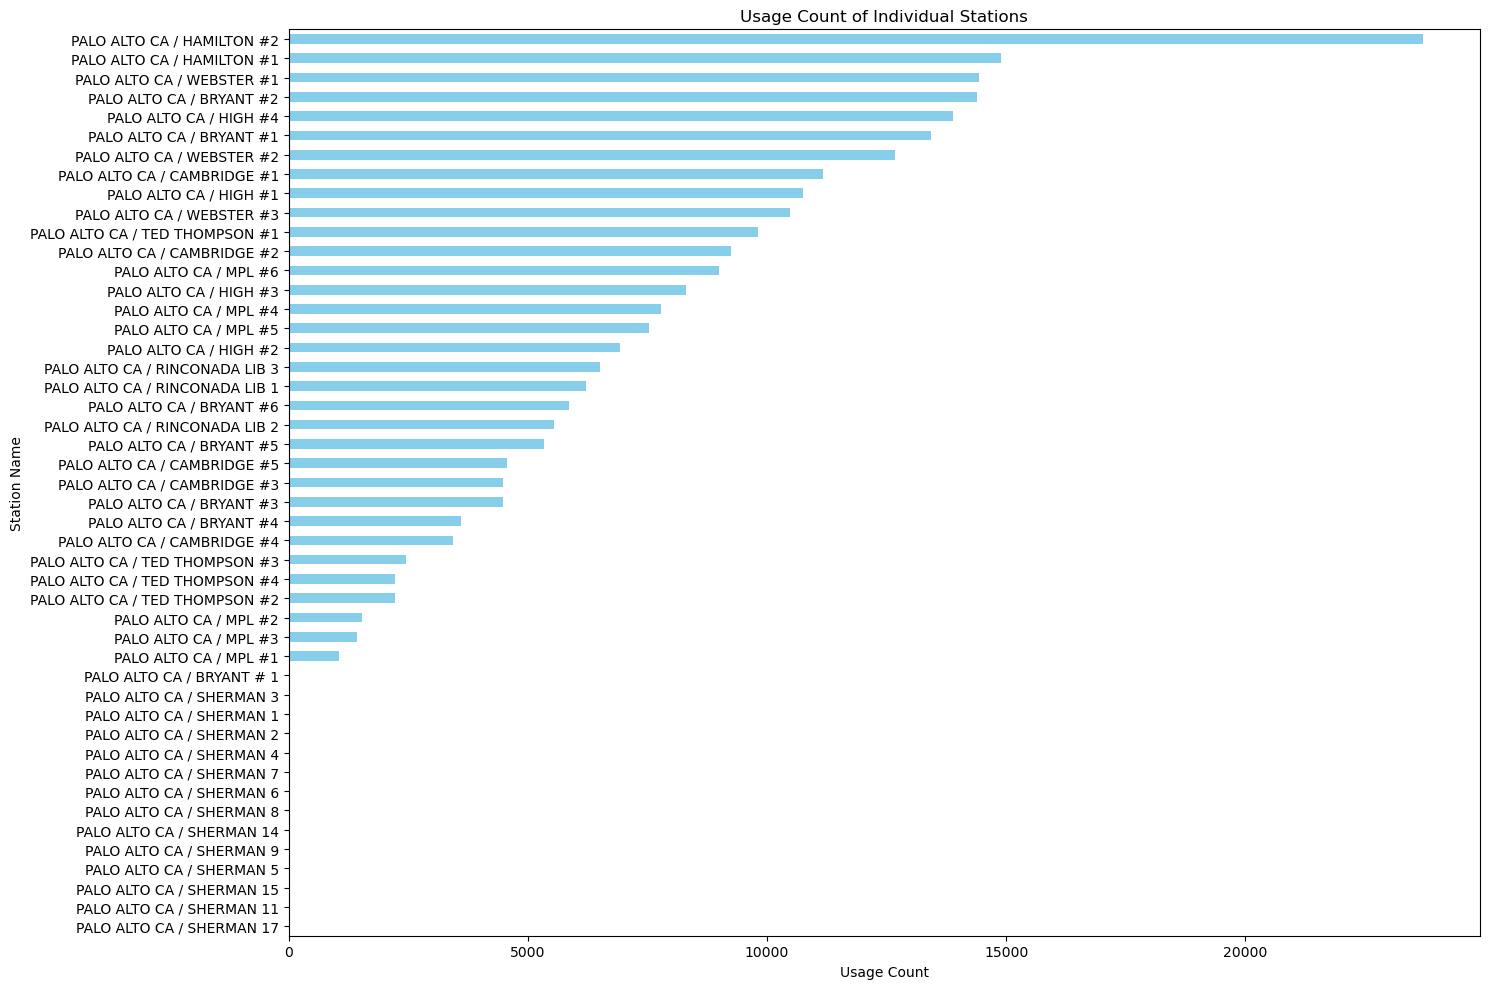

In [10]:
#occurrences of each unique station
station_counts = data['Station Name'].value_counts()
plt.figure(figsize=(15, 10))  
station_counts.plot(kind='barh', color='skyblue')  
plt.title('Usage Count of Individual Stations')
plt.xlabel('Usage Count')
plt.ylabel('Station Name')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

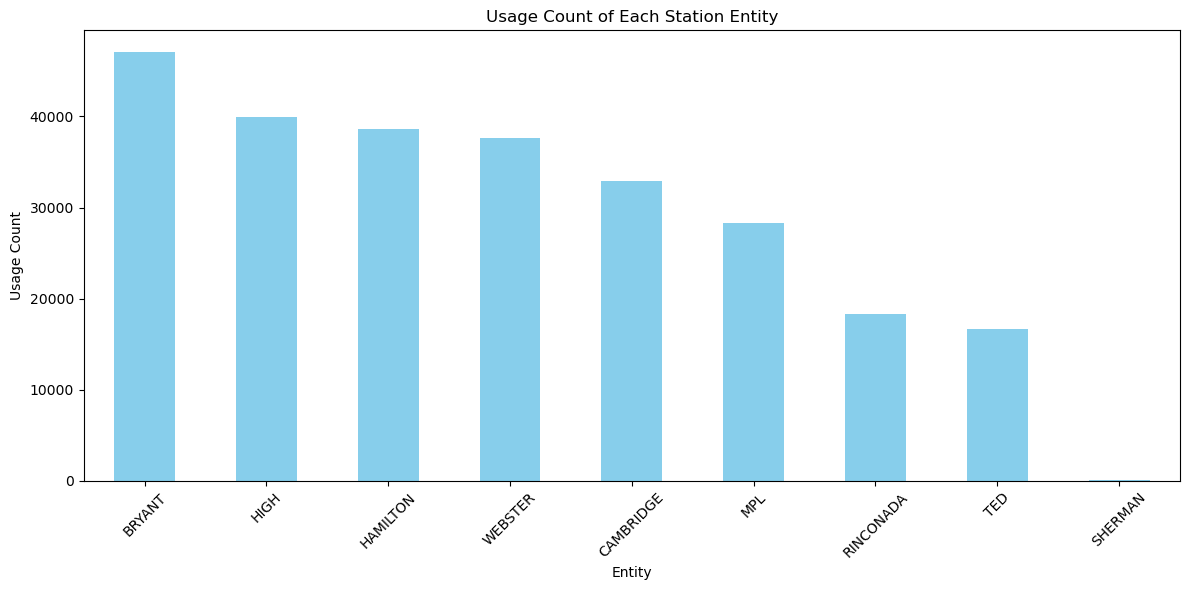

In [3]:
#function to extract the entity based on the first word following "PALO ALTO CA /"
def extract_entity(station_name):
    parts = station_name.split('/')
    if len(parts) > 1:
        # Take the part after "PALO ALTO CA /" and then take the first word
        return parts[1].strip().split(' ')[0]
    else:
        # If the station name does not follow the expected format, return the original
        return station_name

#function to create the 'Entity' column
data['Entity'] = data['Station Name'].apply(extract_entity)
#occurrences of each entity
entity_counts = data['Entity'].value_counts()

#plotting the usage count of each entity
plt.figure(figsize=(12, 6))
entity_counts.plot(kind='bar', color='skyblue')
plt.title('Usage Count of Each Station Entity')
plt.xlabel('Entity')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

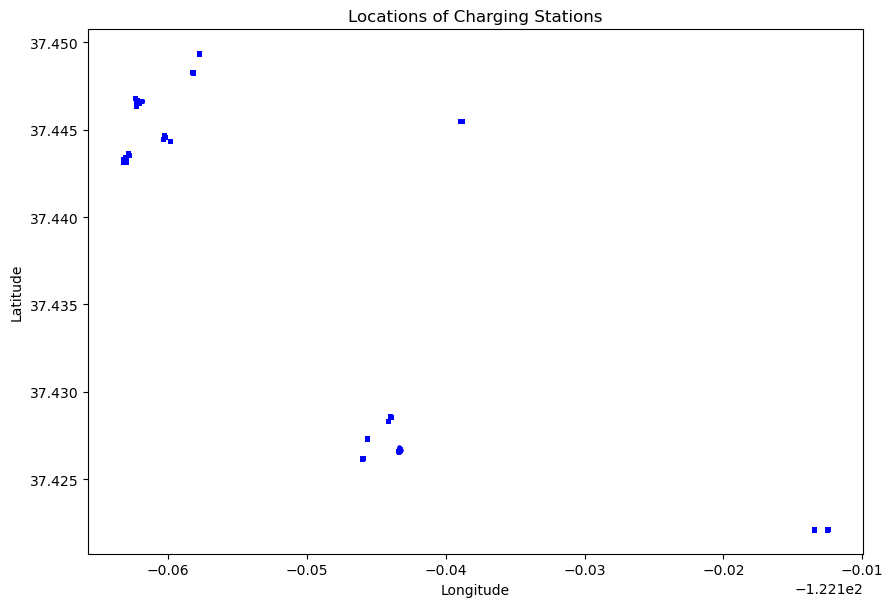

In [4]:
#GeoDataFrame from the CSV data
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
#coordinate reference system to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)
ax.set_title('Locations of Charging Stations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

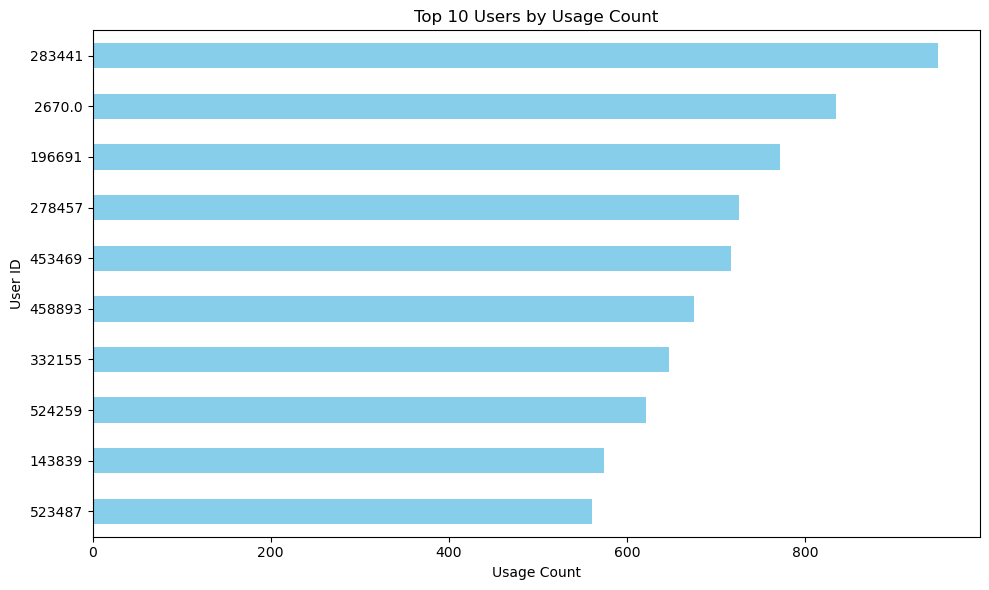

In [5]:
# Count the occurrences of each unique user
user_counts = data['User ID'].value_counts()
top_users = user_counts.head(10)

plt.figure(figsize=(10, 6))
top_users.plot(kind='barh', color='skyblue')
plt.title('Top 10 Users by Usage Count')
plt.xlabel('Usage Count')
plt.ylabel('User ID')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

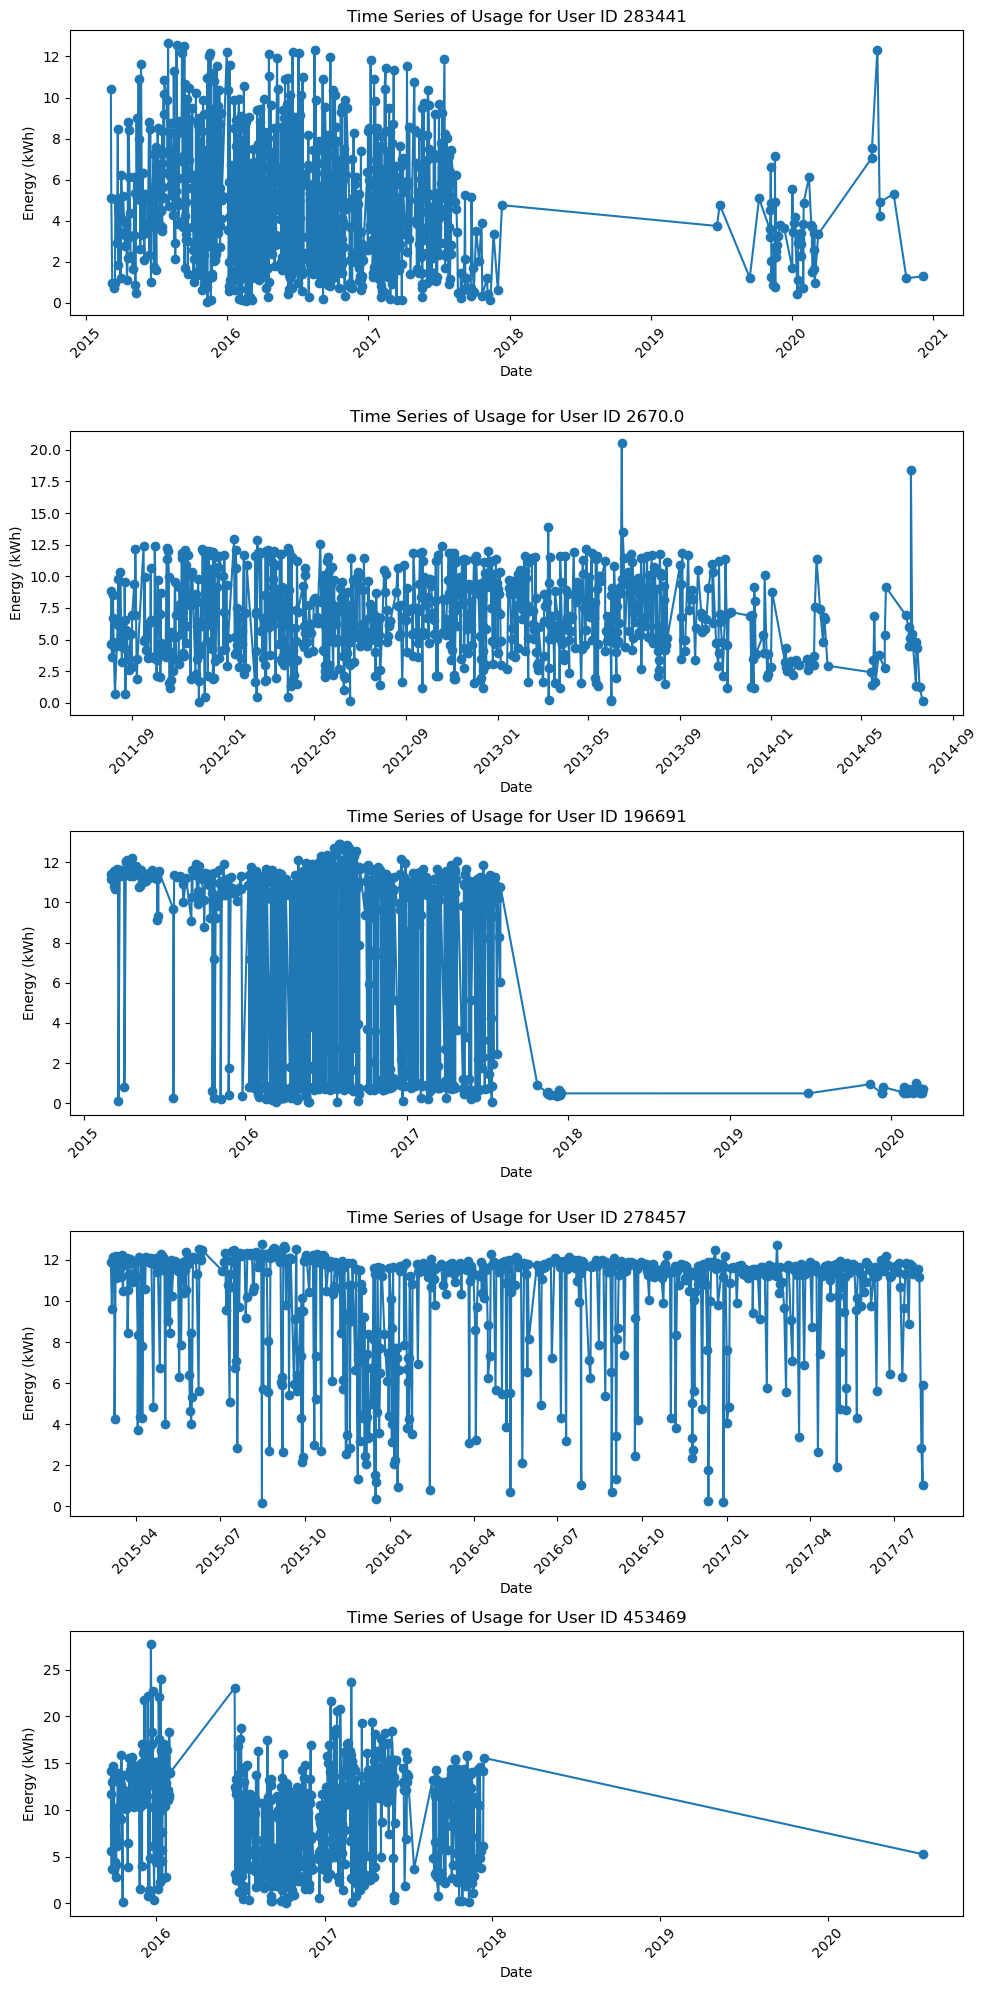

In [6]:
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
# Drop rows where 'Start Date' conversion failed
data.dropna(subset=['Start Date'], inplace=True)
# Find the top 5 users by usage count
top_user_ids = data['User ID'].value_counts().head(5).index
#figure with 5 subplots, one for each top user
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
#time series for each top user
for i, user_id in enumerate(top_user_ids):
    user_data = data[data['User ID'] == user_id].sort_values('Start Date')
    axs[i].plot(user_data['Start Date'], user_data['Energy (kWh)'], marker='o', linestyle='-')
    axs[i].set_title(f'Time Series of Usage for User ID {user_id}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Energy (kWh)')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()